In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize']=10,7.5
plt.rcParams['axes.grid']=True

Populating the interactive namespace from numpy and matplotlib


In [52]:
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [4]:
%cd D:\ANALYTIXLAB\PYTHON PRACTICE kaggle

D:\ANALYTIXLAB\PYTHON PRACTICE kaggle


In [5]:
Ecom_cust=pd.read_csv("Ecommerce Customers.csv")

In [6]:
Ecom_cust.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [7]:
Ecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [8]:
Ecom_cust.corr()

Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000

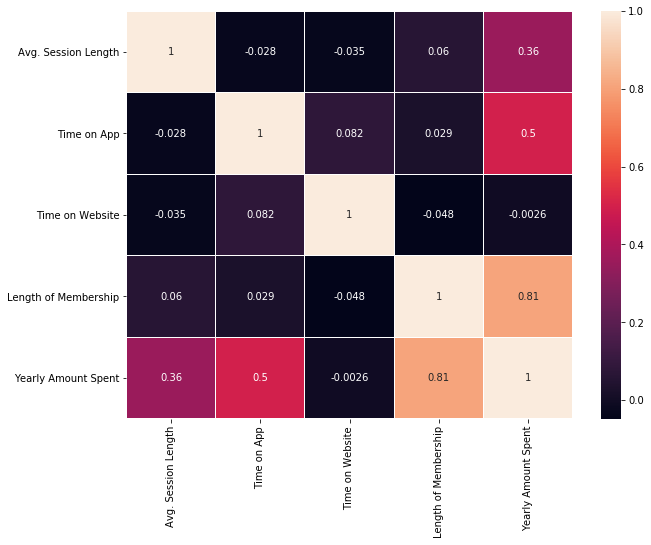

In [13]:
sns.heatmap(Ecom_cust.corr(),linewidth=0.1,annot=True)

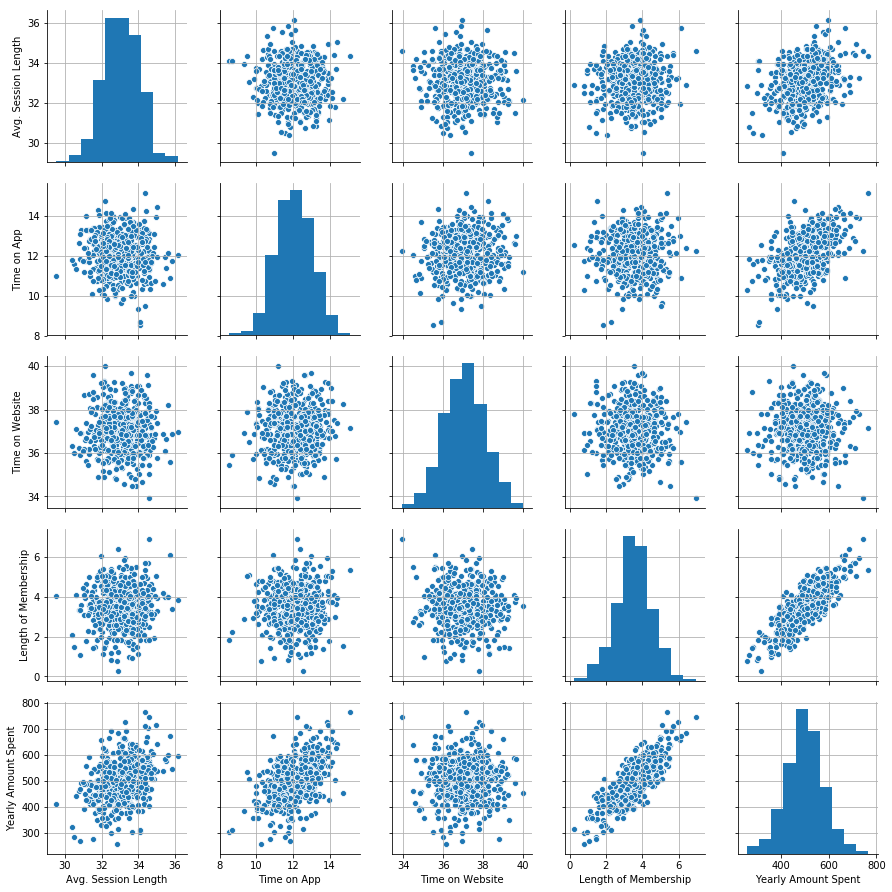

In [14]:
sns.pairplot(Ecom_cust)

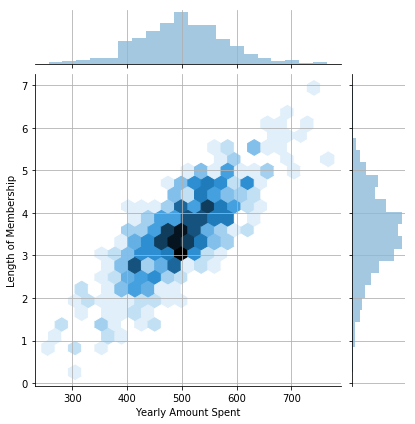

In [17]:
sns.jointplot(data=Ecom_cust, x = "Yearly Amount Spent", y = "Length of Membership", kind = "hex")

In [18]:
Ecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [19]:
pandas_profiling.ProfileReport(Ecom_cust)

In [22]:
Ecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [29]:
#Separate categorical and numerical variables
numeric_var=[key for key in dict(Ecom_cust.dtypes) if dict(Ecom_cust.dtypes)[key] in ['float64','int64','float32','int32']]
cat_var=[key for key in dict(Ecom_cust.dtypes) if dict(Ecom_cust.dtypes)[key] in ['object']]
print(numeric_var)
print(cat_var)


['Time on App', 'Length of Membership', 'Time on Website', 'Yearly Amount Spent', 'Avg. Session Length']
['Email', 'Avatar', 'Address']


In [30]:
#DataFrame for categorical and numerical
Ecom_cust_num=Ecom_cust[numeric_var]
Ecom_cust_cat=Ecom_cust[cat_var]

In [31]:
Ecom_cust_num.head(2)

Time on App  Length of Membership  Time on Website  Yearly Amount Spent  \
0    12.655651              4.082621        39.577668           587.951054   
1    11.109461              2.664034        37.268959           392.204933   

   Avg. Session Length  
0            34.497268  
1            31.926272

In [32]:
Ecom_cust_cat.head(2)

Email     Avatar  \
0  mstephenson@fernandez.com     Violet   
1          hduke@hotmail.com  DarkGreen   

                                          Address  
0    835 Frank Tunnel\nWrightmouth, MI 82180-9605  
1  4547 Archer Common\nDiazchester, CA 06566-8576

In [34]:
Ecom_cust_num.describe().T

count        mean        std         min         25%  \
Time on App           500.0   12.052488   0.994216    8.508152   11.388153   
Length of Membership  500.0    3.533462   0.999278    0.269901    2.930450   
Time on Website       500.0   37.060445   1.010489   33.913847   36.349257   
Yearly Amount Spent   500.0  499.314038  79.314782  256.670582  445.038277   
Avg. Session Length   500.0   33.053194   0.992563   29.532429   32.341822   

                             50%         75%         max  
Time on App            11.983231   12.753850   15.126994  
Length of Membership    3.533975    4.126502    6.922689  
Time on Website        37.069367   37.716432   40.005182  
Yearly Amount Spent   498.887875  549.313828  765.518462  
Avg. Session Length    33.082008   33.711985   36.139662

In [35]:
#Handling Outliers
def outlier_capping(x):
    x=x.clip_upper(x.quantile(.99))
    x=x.clip_lower(x.quantile(.01))
    return x
Ecom_cust_num=Ecom_cust_num.apply(lambda x:outlier_capping(x))
Ecom_cust_num.describe().T

count        mean        std         min         25%  \
Time on App           500.0   12.056006   0.965518    9.822231   11.388153   
Length of Membership  500.0    3.532197   0.977867    1.083426    2.930450   
Time on Website       500.0   37.060260   0.992095   34.778451   36.349257   
Yearly Amount Spent   500.0  499.272433  77.731584  302.155272  445.038277   
Avg. Session Length   500.0   33.054420   0.970539   30.815416   32.341822   

                             50%         75%         max  
Time on App            11.983231   12.753850   14.221649  
Length of Membership    3.533975    4.126502    5.841868  
Time on Website        37.069367   37.716432   39.253342  
Yearly Amount Spent   498.887875  549.313828  700.997273  
Avg. Session Length    33.082008   33.711985   35.434143

In [43]:
#Handling Categorical variable
# An utility function to create dummy variables
def create_dummy(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

    

In [44]:
Ecom_cust_cat.columns

Index([u'Email', u'Address'], dtype='object')

In [45]:
#For C-Feature in Categorical Features:
Ecom_cust_cat=Ecom_cust[['Email','Address']]
for c_feature in ['Email','Address']:
    Ecom_cust_cat[c_feature]=Ecom_cust_cat[c_feature].astype('category')
    Ecom_cust_cat=create_dummy(Ecom_cust_cat,c_feature)
Ecom_cust_cat.head()


    

C:\Users\Satya\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Email_aaron11@luna.com  Email_aaron22@gmail.com  Email_aaron89@gmail.com  \
0                       0                        0                        0   
1                       0                        0                        0   
2                       0                        0                        0   
3                       0                        0                        0   
4                       0                        0                        0   

   Email_acampbell@sanchez-velasquez.info  Email_acontreras@hotmail.com  \
0                                       0                             0   
1                                       0                             0   
2                                       0                             0   
3                                       0                             0   
4                                       0                             0   

   Email_adam75@gmail.com  Email_adamperkins@terrell.com  Email_afry@ford.biz  \
0                       0                              0                    0   
1                       0                              0                    0   
2                       0                              0                    0   
3                       0                              0                    0   
4                       0                              0                    0   

   Email_agolden@yahoo.com  Email_alejandro75@hotmail.com  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

                     ...                     \
0                    ...                      
1                    ...                      
2                    ...                      
3                    ...                      
4                    ...                      

   Address_Unit 3998 Box 4348\nDPO AA 37629  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Address_Unit 4065 Box 2267\nDPO AE 69180-7372  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Address_Unit 4742 Box 9517\nDPO AE 67219-3123  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Address_Unit 5934 Box 9748\nDPO AA 37361-3043  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Address_Unit 6174 Box 1949\nDPO AP 27478  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Address_Unit 6538 Box 8980\nDPO AP 09026-4941  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Address_Unit 6678 Box 6628\nDPO AP 44369  \
0                                         0   
1                           

In [46]:
#PUT THEM BACK TOGETHER Numerical and categorical
Ecom_cust_new=pd.concat([Ecom_cust_num,Ecom_cust_cat],axis=1)

In [47]:
Ecom_cust_new.head()

Time on App  Length of Membership  Time on Website  Yearly Amount Spent  \
0    12.655651              4.082621        39.253342           587.951054   
1    11.109461              2.664034        37.268959           392.204933   
2    11.330278              4.104543        37.110597           487.547505   
3    13.717514              3.120179        36.721283           581.852344   
4    12.795189              4.446308        37.536653           599.406092   

   Avg. Session Length  Email_aaron11@luna.com  Email_aaron22@gmail.com  \
0            34.497268                       0                        0   
1            31.926272                       0                        0   
2            33.000915                       0                        0   
3            34.305557                       0                        0   
4            33.330673                       0                        0   

   Email_aaron89@gmail.com  Email_acampbell@sanchez-velasquez.info  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Email_acontreras@hotmail.com                    ...                     \
0                             0                    ...                      
1                             0                    ...                      
2                             0                    ...                      
3                             0                    ...                      
4                             0                    ...                      

   Address_Unit 3998 Box 4348\nDPO AA 37629  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Address_Unit 4065 Box 2267\nDPO AE 69180-7372  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Address_Unit 4742 Box 9517\nDPO AE 67219-3123  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Address_Unit 5934 Box 9748\nDPO AA 37361-3043  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Address_Unit 6174 Box 1949\nDPO AP 27478  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Address_Unit 6538 Box 8980\nDPO AP 09026-4941  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Address_Unit 6678 Box 6628\nDPO AP 44369  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Address_Unit 7029 Box 3429\nDPO AE 56975  \
0                                         0   
1   

In [48]:
pandas_profiling.ProfileReport(Ecom_cust_new)

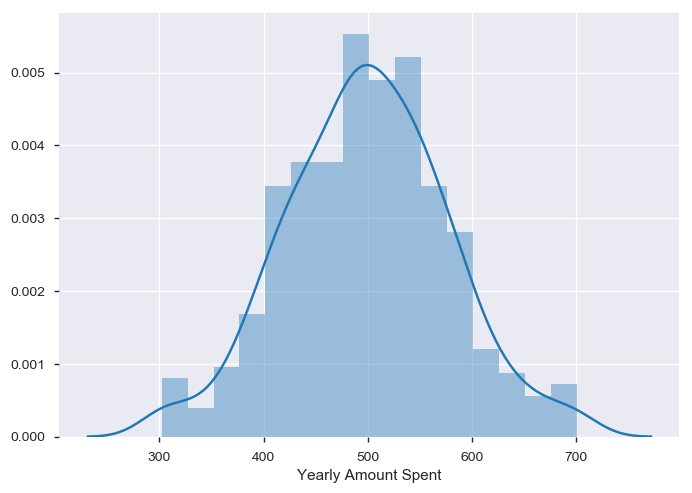

In [50]:
sns.distplot(Ecom_cust_new['Yearly Amount Spent'])

### By using statsmodels.formula.api packages:

In [70]:
Ecom_cust_new.columns=[phase.strip().replace('.','') for phase in Ecom_cust_new.columns]
Ecom_cust_new.columns

Index([u'Time_on_App', u'Length_of_Membership', u'Time_on_Website',
       u'Yearly_Amount_Spent', u'Avg_Session_Length', u'Email_aaron11@lunacom',
       u'Email_aaron22@gmailcom', u'Email_aaron89@gmailcom',
       u'Email_acampbell@sanchez_velasquezinfo',
       u'Email_acontreras@hotmailcom',
       ...
       u'Address_Unit_3998_Box_4348\nDPO_AA_37629',
       u'Address_Unit_4065_Box_2267\nDPO_AE_69180_7372',
       u'Address_Unit_4742_Box_9517\nDPO_AE_67219_3123',
       u'Address_Unit_5934_Box_9748\nDPO_AA_37361_3043',
       u'Address_Unit_6174_Box_1949\nDPO_AP_27478',
       u'Address_Unit_6538_Box_8980\nDPO_AP_09026_4941',
       u'Address_Unit_6678_Box_6628\nDPO_AP_44369',
       u'Address_Unit_7029_Box_3429\nDPO_AE_56975',
       u'Address_Unit_7032_Box_7016\nDPO_AE_44749_2992',
       u'Address_Unit_7502_Box_8345\nDPO_AE_53747'],
      dtype='object', length=1003)

In [72]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(Ecom_cust_new,test_size=0.3,random_state=119)
#all_columns="+".join(train.columns.difference(['Yearly_Amount_Spent']))
my_formula="Yearly_Amount_Spent~"+"Time_on_App"+"+Length_of_Membership"+"+Time_on_Website"+"+Avg_Session_Length"
print(my_formula)

Yearly_Amount_Spent~Time_on_App+Length_of_Membership+Time_on_Website+Avg_Session_Length


In [73]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=my_formula+"-1",data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 4.100e+04
Date:                 Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                         00:46:34   Log-Likelihood:                -1597.9
No. Observations:                  350   AIC:                             3204.
Df Residuals:                      346   BIC:                             3219.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Time_on_App             35.2361      1.281     27.504      0.000      32.716      37.756
Length_of_Membership    61.4923      1.308     47.014      0.000      58.920      64.065
Time_on_Website        -13.8118      0.874    -15.794      0.000     -15.532     -12.092
Avg_Session_Length      11.1879      0.999     11.202      0.000       9.224      13.152
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.523
Skew:                           0.002   Prob(JB):                        0.770
Kurtosis:                       2.811   Cond. No.                         57.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Split the data into training and testing:
#Feature_columns means only X variables
feature_columns=Ecom_cust_new.columns.difference(['Yearly Amount Spent'])
feature_columns

Index([u'Address_001 Estrada Union\nLewismouth, TN 47360',
       u'Address_0013 Andre Field\nWhitebury, AZ 68447-6306',
       u'Address_0030 Mathis Square Suite 154\nSouth Jadehaven, AR 33997-4450',
       u'Address_00615 Tracy Islands\nNew Marcfort, MO 87297-7431',
       u'Address_01242 Stephanie Ways Suite 003\nChurchville, MO 35617',
       u'Address_0127 Morgan Fields Apt. 080\nThompsonfurt, ME 01160-7043',
       u'Address_0128 Sampson Loop Suite 943\nHoffmanton, MO 02122',
       u'Address_01512 Hendricks Rue\nEast Pamela, PR 46481',
       u'Address_019 Elliott Tunnel Suite 190\nNicholsbury, WV 60804-4440',
       u'Address_02136 White Grove Suite 418\nMarytown, DE 70033',
       ...
       u'Email_xkaufman@gmail.com', u'Email_youngbarbara@yahoo.com',
       u'Email_youngellen@hotmail.com', u'Email_yvaughn@meyer.com',
       u'Email_zachary94@gmail.com', u'Email_zmalone@yahoo.com',
       u'Email_zscott@wright.com', u'Length of Membership', u'Time on App',
       u'Time on We

In [53]:
train_X,test_X,train_y,test_y=train_test_split(Ecom_cust_new[feature_columns],Ecom_cust_new['Yearly Amount Spent'],
                                               test_size=0.3,random_state=111)

In [58]:
train_X.head()

const  Address_001 Estrada Union\nLewismouth, TN 47360  \
99     1.0                                                0   
267    1.0                                                0   
49     1.0                                                0   
115    1.0                                                0   
11     1.0                                                0   

     Address_0013 Andre Field\nWhitebury, AZ 68447-6306  \
99                                                   0    
267                                                  0    
49                                                   0    
115                                                  0    
11                                                   0    

     Address_0030 Mathis Square Suite 154\nSouth Jadehaven, AR 33997-4450  \
99                                                   0                      
267                                                  0                      
49                                                   0                      
115                                                  0                      
11                                                   0                      

     Address_00615 Tracy Islands\nNew Marcfort, MO 87297-7431  \
99                                                   0          
267                                                  0          
49                                                   0          
115                                                  0          
11                                                   0          

     Address_01242 Stephanie Ways Suite 003\nChurchville, MO 35617  \
99                                                   0               
267                                                  0               
49                                                   0               
115                                                  0               
11                                                   0               

     Address_0127 Morgan Fields Apt. 080\nThompsonfurt, ME 01160-7043  \
99                                                   0                  
267                                                  0                  
49                                                   0                  
115                                                  0                  
11                                                   0                  

     Address_0128 Sampson Loop Suite 943\nHoffmanton, MO 02122  \
99                                                   0           
267                                                  0           
49                                                   0           
115                                                  0           
11                                                   0           

     Address_01512 Hendricks Rue\nEast Pamela, PR 46481  \
99                                                   0    
267                                                  0    
49                                                   0    
115                                                  0    
11                                                   0    

     Address_019 Elliott Tunnel Suite 190\nNicholsbury, WV 60804-4440  \
99                                                   0                  
267                                                  0                  
49                                                   0                  
115                                                  0                  
11                                                   0                  

          ...         Email_xkaufman@gmail.com  Email_youngbarbara@yahoo.com  \
99        ...                                0                             0   
267       ...                                0                             0   
49        ...                                0                             0   
115       ...                                0

In [59]:
test_X.head()

Address_001 Estrada Union\nLewismouth, TN 47360  \
292                                                0   
337                                                0   
430                                                0   
399                                                0   
380                                                0   

     Address_0013 Andre Field\nWhitebury, AZ 68447-6306  \
292                                                  0    
337                                                  0    
430                                                  0    
399                                                  0    
380                                                  0    

     Address_0030 Mathis Square Suite 154\nSouth Jadehaven, AR 33997-4450  \
292                                                  0                      
337                                                  0                      
430                                                  0                      
399                                                  0                      
380                                                  0                      

     Address_00615 Tracy Islands\nNew Marcfort, MO 87297-7431  \
292                                                  0          
337                                                  0          
430                                                  0          
399                                                  0          
380                                                  0          

     Address_01242 Stephanie Ways Suite 003\nChurchville, MO 35617  \
292                                                  0               
337                                                  0               
430                                                  0               
399                                                  0               
380                                                  0               

     Address_0127 Morgan Fields Apt. 080\nThompsonfurt, ME 01160-7043  \
292                                                  0                  
337                                                  0                  
430                                                  0                  
399                                                  0                  
380                                                  0                  

     Address_0128 Sampson Loop Suite 943\nHoffmanton, MO 02122  \
292                                                  0           
337                                                  0           
430                                                  0           
399                                                  0           
380                                                  0           

     Address_01512 Hendricks Rue\nEast Pamela, PR 46481  \
292                                                  0    
337                                                  0    
430                                                  0    
399                                                  0    
380                                                  0    

     Address_019 Elliott Tunnel Suite 190\nNicholsbury, WV 60804-4440  \
292                                                  0                  
337                                                  0                  
430                                                  0                  
399                                                  0                  
380                                                  0                  

     Address_02136 White Grove Suite 418\nMarytown, DE 70033       ...         \
292                                                  0             ...          
337                                                  0             ...          
430                                                  0             ...          
399                                                  0             ...          
380

In [55]:
import statsmodels.api as sm
#Use Ordinary List Square Model: OLS Model
train_X=sm.add_constant(train_X)

lm=sm.OLS(train_y,train_X).fit()a

In [60]:
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                     0.000
Date:                 Mon, 24 Jun 2019   Prob (F-statistic):                nan
Time:                         00:27:49   Log-Likelihood:                 8820.7
No. Observations:                  350   AIC:                        -1.694e+04
Df Residuals:                        0   BIC:                        -1.559e+04
Df Model:                          349                                         
Covariance Type:             nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------